##### Fluid Dynamics-Inspired Emotional Analysis & Sentiment Flow for Argumentation Mining (AM)
- Stance basesd Argument Mining Modeling Using NRC and SneticNet Emotion Analysis


The idea is to use "Emotional Analysis" (NRC,SenticNet, SOCAL) to improve

- Stance Claissfication
- Fine-Grained Classifcation 

- https://aclanthology.org/J11-2001.pdf
- https://github.com/sfu-discourse-lab/SO-CAL

In [62]:
import shutil
import pandas as pd
from SentimentFlow import SpeechProcessor
from SentimentFlow import SentimentFlowCalculator
#https://github.com.mcas.ms/dpicca/SentimentFlow
pd.set_option("display.max_colwidth", None)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
import os
import spacy
from nrclex import NRCLex



# Argumentative Microtext Part 1

we've done a extensive pre-processing on microtext to extract all layers of annotations. The focus is stance classifcation 

In [63]:
df = pd.read_json("../data/dfMT-PC_SA_CP_topicID_AduType.json") 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EDU        112 non-null    object
 1   adu_type   112 non-null    object
 2   topic_id   89 non-null     object
 3   Relations  112 non-null    object
 4   Label      112 non-null    object
 5   STANCE     89 non-null     object
dtypes: object(6)
memory usage: 6.1+ KB


In [4]:
df[0:10]   

,EDU,adu_type,topic_id,Relations,Label,STANCE
0,"[Yes, it's annoying and cumbersome to separate your rubbish properly all the time., Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins., But still Germany produces way too much rubbish, and too many resources are lost when what actually should be separated and recycled is burnt., We Berliners should take the chance and become pioneers in waste separation!]","[opp, opp, pro, pro, pro]",waste_separation,"[[a1, a5, reb], [a2, a1, sup], [a3, c1, und], [a4, c3, add]]","[0, 0, 0, 0, 1]",pro
1,"[One can hardly move in Friedrichshain or Neukölln these days without permanently scanning the ground for dog dirt., And when bad luck does strike and you step into one of the many 'land mines' you have to painstakingly scrape the remains off your soles., Higher fines are therefore the right measure against negligent, lazy or simply thoughtless dog owners., Of course, first they'd actually need to be caught in the act by public order officers,, but once they have to dig into their pockets, their laziness will sure vanish!]","[pro, pro, pro, opp, pro]",higher_dog_poo_fines,"[[a1, a3, sup], [a2, a3, sup], [a4, a3, reb], [a5, c4, und]]","[0, 0, 1, 0, 0]",pro
2,"[Health insurance companies should not cover treatment in complementary medicine, unless the promised effect and its medical benefit have been concretely proven., Yet this very proof is lacking in most cases., Patients do often report relief of their complaints after such treatments., But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.]","[pro, opp, pro, opp, pro]",health_insurance_cover_complementary_medicine,"[[a2, a1, reb], [a3, a2, reb], [a4, a1, reb], [a5, c4, und]]","[1, 0, 0, 0, 0]",con
3,"[Of course there are a number of programmes in public broadcasting that are not worth the licencing fee,, and others, such as “Musikantenstadl” and soap operas, are only interesting to certain audiences., Nevertheless, everybody should contribute to the funding of the public broadcasters in equal measure,, for we need general and independent media., After all we want to get our view of the world neither through the lens of the government nor through that of rich media entrepreneurs.]","[opp, opp, pro, pro, pro]",public_broadcasting_fees_on_demand,"[[a1, a3, reb], [a2, a3, reb], [a4, a3, sup], [a5, a4, sup]]","[0, 0, 1, 0, 0]",con
4,"[Intelligence services must urgently be regulated more tightly by parliament;, this should be clear to everyone after the disclosures of Edward Snowden., Granted, those concern primarily the British and American intelligence services,, but the German services evidently do collaborate with them closely., Their tools, data and expertise have been used to keep us under surveillance for a long time.]","[pro, pro, opp, pro, pro]",stricter_regulation_of_intelligence_services,"[[a2, a1, sup], [a3, c2, und], [a4, c3, und], [a5, a4, sup]]","[1, 0, 0, 0, 0]",pro
5,"[The death penalty is a legal means that as such is not practicable in Germany., For one thing, inviolable human dignity is anchored in our constitution,, and furthermore no one may have the right to adjudicate upon the death of another human being., Even if many people think that a murderer has already decided on the life or death of another person,, this is precisely the crime that we should not repay with the same.]","[pro, pro, pro, opp, pro]",introduce_capital_punishment,"[[a2, a1, sup], [a3, a1, sup], [a4, a1, reb], [a5, c4, und]]","[1, 0, 0, 0, 0]",con
6,"[Dog dirt on the pavement requires my complete, ground-focused attention on my way to work., This results in a lack of alertness in the road traffic comparable to a minor offense of the traffic regulations., That's why causing such obstacles must to be more urgently punished., Dog owners may think that dog dirt is only a harmless secretion of an animal like any other., Yet then they misj

### A-NRC for emotion analysis

In [5]:
def calculate_nrc(text):
    nlp = spacy.load("en_core_web_sm")    
    doc = nlp(text)
    nrc_sentiment = NRCLex(text)
    return(nrc_sentiment.affect_frequencies)

In [33]:
print(df.EDU[0],"\n", df.adu_type[0])

["Yes, it's annoying and cumbersome to separate your rubbish properly all the time.", 'Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.', 'But still Germany produces way too much rubbish', 'and too many resources are lost when what actually should be separated and recycled is burnt.', 'We Berliners should take the chance and become pioneers in waste separation!'] 
 ['opp', 'opp', 'pro', 'pro', 'pro']


In [83]:
calculate_nrc(df.EDU[0][4])  #which feaure are usefull for stance classfication. 

{'fear': 0.0,
 'anger': 0.0,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.3333333333333333,
 'positive': 0.0,
 'negative': 0.3333333333333333,
 'sadness': 0.0,
 'disgust': 0.3333333333333333,
 'joy': 0.0,
 'anticipation': 0.0}

In [76]:
def calculate_nrc(text):
    """Calculate NRC sentiment frequencies for a given text."""
    if isinstance(text, list):  # Check if the input is a list
        text = " ".join(text)  # Join the list elements into a single string
    if not isinstance(text, str):  # Ensure that it's a string
        raise ValueError(f"Expected string input, but got {type(text)}")
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)  # Process the text with spaCy
    nrc_sentiment = NRCLex(text)  # Analyze the text with NRC lexicon
    return nrc_sentiment.affect_frequencies


In [ ]:
import pandas as pd
import spacy
from nrclex import NRCLex
import plotly.express as px

nlp = spacy.load("en_core_web_sm")

def calculate_nrc(text):
    nrc_sentiment = NRCLex(text)
    affect_dict = nrc_sentiment.affect_frequencies
    
    base_emotions = ['fear', 'anger', 'anticipation', 'trust', 'surprise', 
                     'positive', 'negative', 'sadness', 'disgust', 'joy']
    
    for emotion in base_emotions:
        if emotion not in affect_dict:
            affect_dict[emotion] = 0.0
            
    return affect_dict

def process_data(df):
    df_exp = df.explode(['EDU', 'adu_type'])
    
    nrc_features = df_exp['EDU'].apply(lambda x: pd.Series(calculate_nrc(x)))
    
    return pd.concat([df_exp[['adu_type']], nrc_features], axis=1)

def visualize_correlation(processed_df):
    grouped = processed_df.groupby('adu_type').mean().reset_index()
    
    melted = grouped.melt(id_vars='adu_type', 
                         var_name='Emotion', 
                         value_name='Intensity')
    
    fig = px.imshow(
        grouped.set_index('adu_type').T,
        labels=dict(x="ADU Type", y="NRC Dimension", color="Intensity"),
        color_continuous_scale='RdBu',
        title="NRC Emotion Intensity by ADU Type",
        aspect="auto"
    )
    
    fig.update_layout(
        xaxis_title="ADU Type",
        yaxis_title="NRC Emotion Dimension",
        coloraxis_colorbar=dict(title="Intensity")
    )
    
    return fig

processed_df = process_data(df)
fig = visualize_correlation(processed_df)
fig.show()

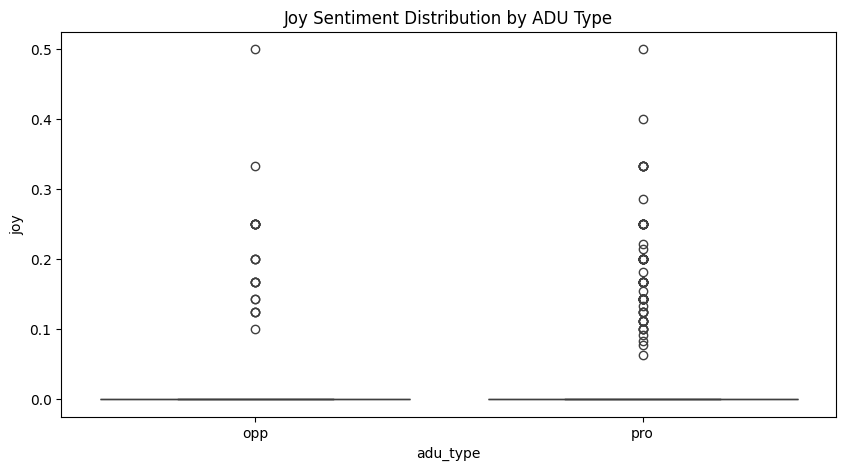

In [32]:
import pandas as pd
import spacy
from nrclex import NRCLex
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

def calculate_nrc(text):
    """Calculate NRC sentiment frequencies for a given text."""
    nrc_sentiment = NRCLex(text)
    return nrc_sentiment.affect_frequencies

# Sample Data (Replace with actual dataset)
data =df

# Explode the lists into separate rows
data = data.explode(["EDU", "adu_type"]).reset_index(drop=True)

# Apply NRC function to each text element
data["nrc_scores"] = data["EDU"].apply(calculate_nrc)

# Expand NRC sentiment features into separate columns
nrc_df = data["nrc_scores"].apply(pd.Series)
data = pd.concat([data, nrc_df], axis=1).drop(columns=["nrc_scores"])

# Visualize sentiment differences by `adu_type`
plt.figure(figsize=(10, 5))
sns.boxplot(x="adu_type", y="joy", data=data)
plt.title("Joy Sentiment Distribution by ADU Type")
plt.show()




In [70]:
print(df[2:5])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        EDU  \
2                                                                           [Health insurance companies should not cover treatment in complementary medicine, unless the promised effect and its medical benefit have been concretely proven., Yet this very proof is lacking in most cases., Patients do often report relief of their complaints after such treatments., But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.]   
3  [Of cou

In [45]:
def calculate_nrc_list(text_list):
    """Calculate NRC sentiment frequencies for a list of texts and return the average scores."""
    all_scores = []
    for text in text_list:
        nrc_sentiment = NRCLex(text)
        all_scores.append(nrc_sentiment.affect_frequencies)
    
    # Convert list of dictionaries to a DataFrame and compute the mean for each sentiment
    if all_scores:
        avg_scores = pd.DataFrame(all_scores).mean().to_dict()
    else:
        avg_scores = {}
    
    return avg_scores




In [50]:
# Prepare for Machine Learning
X = data.drop(columns=["EDU", "adu_type"])
y = data["adu_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

fig_importance = px.bar(feature_importance_df, x='Feature', y='Importance', 
                        title="Feature Importance in Classification", color='Importance', 
                        template="plotly_dark")
fig_importance.show()


Accuracy: 0.0
              precision    recall  f1-score   support

         opp       0.00      0.00      0.00       1.0
         pro       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



h:\moha\NLP\AM\SA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

h:\moha\NLP\AM\SA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

h:\moha\NLP\AM\SA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

h:\moha\NLP\AM\SA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

h:\moha\NLP\AM\SA\.venv\

### B-Senticnet for emotion analysis

# Argumentative Microtext Part 2

In [80]:
df2 = pd.read_json("../data/dfMT2-PC_SA_CP_topicID_AduType.json") 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EDU        171 non-null    object
 1   adu_type   171 non-null    object
 2   topic_id   171 non-null    object
 3   Relations  171 non-null    object
 4   Label      171 non-null    object
 5   STANCE     171 non-null    object
dtypes: object(6)
memory usage: 9.4+ KB


In [ ]:
df2[0:10]

,EDU,adu_type,topic_id,Relations,Label,STANCE
0,"[Hunting is good for the environment, because overpopulated species can be thinned out., Getting rid of an overpopulation enables the smaller animals in the food chain to grow., It also allows for nature to take back the woods and grasslands, which will also enable other wildlife to grow., Some people may object to hunting on the basis of humane treatment of animals., Animals do not necessarily feel pain as we do,, and if there are not enough resources to sustain an overpopulation, then a quick bullet or arrow is better than slow starvation.]","[pro, pro, pro, pro, opp, pro, pro]",hunting_improves_environment,"[[a2, a1, sup], [a3, a2, sup], [a4, a2, sup], [a5, a1, reb], [a6, a5, reb], [a7, a5, reb]]","[1, 0, 0, 0, 0, 0, 0]",pro
1,"[In some cases, hunting can remove threats to the environment., Texas, in particular, has an overabundance of wild/feral boars that destroy farmers' fields, and root up other ground, too., Furthermore, hunting your own meat saves up the natural resources that would otherwise be used in a processing plant., Hunting is good for the environment.]","[pro, pro, pro, pro]",hunting_improves_environment,"[[a2, a1, sup], [a4, a1, sup]]","[1, 0, 0, 0]",pro
2,"[We should continue hunting, as it provides a sustainable resource., Hunting thins the herd of animals and makes the group as a whole healthier., Some would argue that hunting puts a species at risk for extinction,, but good wildlife management practices mitigate this risk., Overall, hunting poses no real threat to the environment.]","[pro, pro, pro, opp, pro]",hunting_improves_environment,"[[a2, a1, sup], [a3, a2, sup], [a4, a1, reb], [a5, c3, und]]","[1, 0, 0, 0, 0]",pro
3,"[In the absence of wolves and other large predators, humans become the deer population control to keep to deer from over-grazing regional flora., The ecosystem needs this delicate balance,, so it is also important not to over-hunt., As long as restraint and practicality are applied to hunting, the environment will not suffer., Hunting is good.]","[pro, pro, pro, pro, pro]",hunting_improves_environment,"[[a2, a4, sup], [a3, c1, add], [a4, a5, sup], [a5, a1, sup]]","[1, 0, 0, 0, 0]",pro
4,"[I believe that older people don't make better parents., While they do have more experience in life, and may be able to offer their child more guidance when it comes to difficult decisions that child will have to face,, they also are going to have a more difficult time staying active with the child., Children are INCREDIBLY active, and it takes a lot of energy to keep up with them., It would seem to me to discourage physical activity if the parents are older, and this is at a time when children as a whole are becoming less physically fit and less active., While I do acknowledge that older parents do have more life knowledge,, the inexperience of a young parent can be offset by their parents (the child's grandparents), god parents, and family friends.]","[opp, opp, pro, pro, pro, pro, pro, pro]",older_people_better_parents,"[[a1, a2, sup], [a2, a7, reb], [a3, a8, sup], [a4, a3, sup], [a5, c4, add], [a6, c1, und], [a8, c2, und]]","[0, 0, 0, 0, 0, 0, 1, 0]",con
5,"[Older people do not necessarily make better parents., While it might be tempting to think that older parents will exercise better judgment in childrearing,, it is simply not the case that growing older means growing wiser., Younger parents will likely have levels of physical energy and stamina more closely aligned to their children's., Young mothers are more likely to bear healthy children,, which is no small part of being a good parent., Finally, older parents will reach the age at which they need support from their children when their children are relatively young and not yet in the peak earning years.]","[pro, opp, pro, pro, pro, pro, pro]",older_people_better_parents,"[[a2, a1, reb], [a3, a2, reb], [a4, a1, sup], [a5, a1, sup], [a6, c4, add], [a7, a1, sup]]","[1, 0, 0, 0, 0, 0, 0]",con
6,"[

In [81]:
processed_df2 = process_data(df2)
fig = visualize_correlation(processed_df2)
fig.show()

ValueError: columns must have matching element counts